# Chocolate Data Set EDA
<br>
 What's in this notebook:
 <ol>
  <li>Data Visualization</li>
  <li>Statistical Tests</li>
</ol>

# Data Visualization

In [1]:
## For data handling
import pandas as pd
import numpy as np
import statsmodels
import scipy
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

In [2]:
# directory modification maybe needed
choco = pd.read_csv("combined_train.csv", keep_default_na = False)
choco.columns

Index(['Unnamed: 0', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'taste', 'vanilla',
       'salt', 'sugar', 'sweetener', 'cocoa_butter', 'lecithin',
       'company_continent', 'origin_continent', 'nutty', 'sweet', 'cocoa',
       'roasty', 'creamy', 'earthy', 'sandy', 'fatty', 'floral', 'intense',
       'spicy', 'sour', 'molasses', 'woody', 'vanilla_taste', 'sticky',
       'fruit', 'smokey'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', None)
choco.head()

Unnamed: 0   company company_location  review_date country_of_bean_origin  \
0           0      5150    United States         2019             Madagascar   
1           1      5150    United States         2019     Dominican republic   
2           2      5150    United States         2019               Tanzania   
3           3  A. Morin           France         2012                   Peru   
4           4  A. Morin           France         2012                Bolivia   

  specific_bean_origin_or_bar_name  cocoa_percent  rating  \
0           Bejofo Estate, batch 1           76.0    3.75   
1                  Zorzal, batch 1           76.0    3.50   
2            Kokoa Kamili, batch 1           76.0    3.25   
3                             Peru           63.0    3.75   
4                          Bolivia           70.0    3.50   

   counts_of_ingredients                         taste  vanilla  salt  sugar  \
0                      3  cocoa, blackberry, full body        0     0      1   
1                      3        cocoa, vegetal, savory        0     0      1   
2                      3     rich cocoa, fatty, bready        0     0      1   
3                      4         fruity, melon, roasty        0     0      1   
4                      4                vegetal, nutty        0     0      1   

   sweetener  cocoa_butter  lecithin company_continent origin_continent  \
0          0             1         0                NA               AF   
1          0             1         0                NA               NA   
2          0             1         0                NA               AF   
3          0             1         1                EU               SA   
4          0             1         1                EU               SA   

   nutty  sweet  cocoa  roasty  creamy  earthy  sandy  fatty  floral  intense  \
0      0      0      1       0       0       0      0      0       0        0   
1      0      0      1       0       0       0      0      0       0        0   
2      0      0      1       0       0       0      0      1       0        0   
3      0      0      0       1       0       0      0      0       0        0   
4      1      0      0       0       0       0      0      0       0        0   

   spicy  sour  molasses  woody  vanilla_taste  sticky  fruit  smokey  
0      0     0         0      0              0       0      1       0  
1      0     0         0      0              0       0      0       0  
2      0     0         0      0              0       0      0       0  
3      0     0         0      0              0       0      1       0  
4      0     0         0      0              0       0      0       0

In [4]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   company                           2224 non-null   object 
 2   company_location                  2224 non-null   object 
 3   review_date                       2224 non-null   int64  
 4   country_of_bean_origin            2224 non-null   object 
 5   specific_bean_origin_or_bar_name  2224 non-null   object 
 6   cocoa_percent                     2224 non-null   float64
 7   rating                            2224 non-null   float64
 8   counts_of_ingredients             2224 non-null   int64  
 9   taste                             2224 non-null   object 
 10  vanilla                           2224 non-null   int64  
 11  salt                              2224 non-null   int64  
 12  sugar 

In [5]:
# choco.nunique()

In [6]:
choco['sweetener']

0       0
1       0
2       0
3       0
4       0
       ..
2219    1
2220    0
2221    0
2222    0
2223    0
Name: sweetener, Length: 2224, dtype: int64

In [7]:
print(choco["cocoa_butter"].value_counts('have_cocoa_butter'))
print("-------------------------------------------")
print(choco["sugar"].value_counts('have_sugar'))
print("-------------------------------------------")
print(choco["sweetener"].value_counts(1))
print("-------------------------------------------")
print(choco["vanilla"].value_counts('have_vanilla'))
print("-------------------------------------------")
print(choco["lecithin"].value_counts('have_lecithin'))
print("-------------------------------------------")
print(choco["salt"].value_counts('have_salt'))

1    0.690198
0    0.309802
Name: cocoa_butter, dtype: float64
-------------------------------------------
1    0.963129
0    0.036871
Name: sugar, dtype: float64
-------------------------------------------
0    0.965827
1    0.034173
Name: sweetener, dtype: float64
-------------------------------------------
0    0.843525
1    0.156475
Name: vanilla, dtype: float64
-------------------------------------------
0    0.784622
1    0.215378
Name: lecithin, dtype: float64
-------------------------------------------
0    0.983363
1    0.016637
Name: salt, dtype: float64


## Distribution of rating

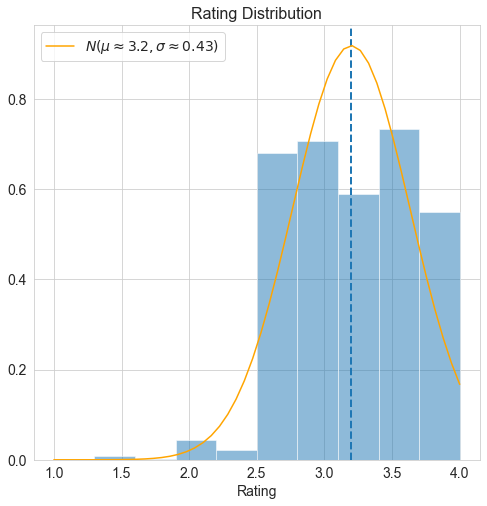

In [8]:
from scipy.stats import norm

mean = np.mean(choco['rating'])
std = np.std(choco['rating'], ddof=1)
xrange = np.linspace(np.min(choco['rating']), np.max(choco['rating']))

plt.figure(figsize = (8, 8))
plt.hist(choco['rating'], alpha = 0.5, density = True)
plt.axvline(x = choco['rating'].mean(), linestyle = '--', linewidth = 2)
plt.plot(xrange, norm.pdf(xrange, mean, std), color='orange',
         label = '$N$' + f'$( \mu \\approx {np.round(mean,2)}, \sigma \\approx {np.round(std,2)} )$' )
plt.xlabel('Rating', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Rating Distribution', fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

## Cocoa Percent - Rating

the only numeric feature is cocoa_percent (treat discrete values as categorical)

C:\Users\songh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


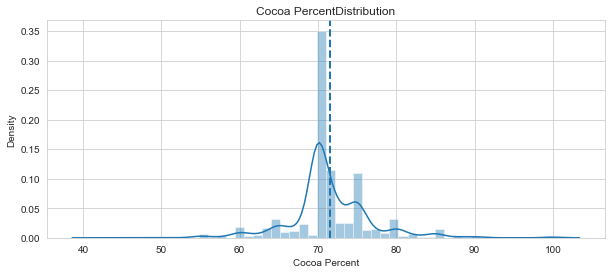

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(choco['cocoa_percent'])
plt.axvline(x=choco['cocoa_percent'].mean(), linestyle='--', linewidth=2)
plt.xlabel('Cocoa Percent')
plt.title('Cocoa PercentDistribution')
plt.show()

Bubble plot: cocoa_percent - rating

In [10]:
# review size by review date
sz_cp = choco.groupby(['cocoa_percent', 'rating']).size()

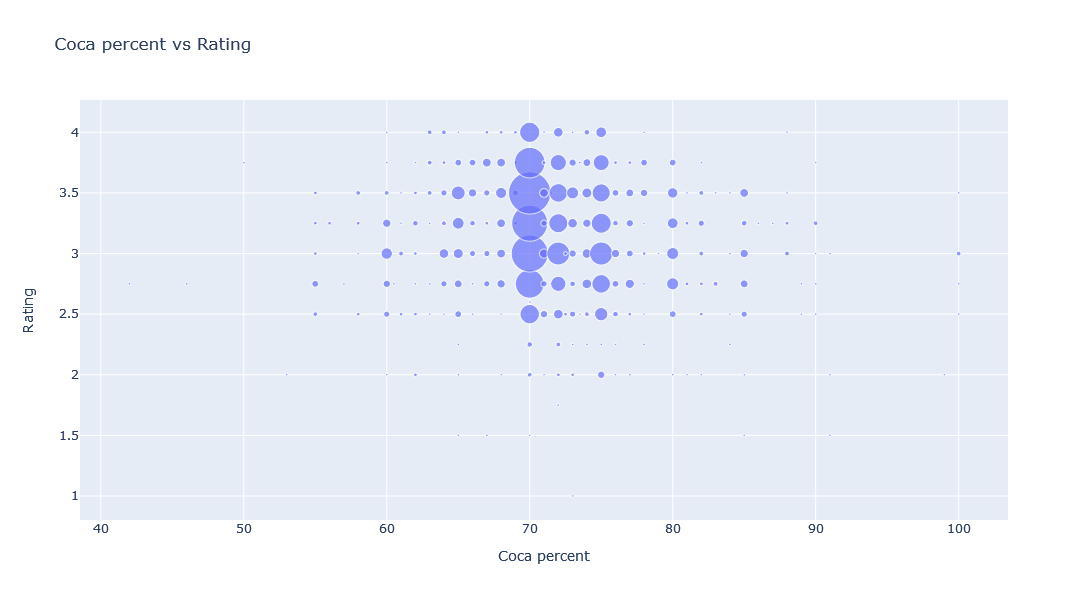

In [11]:
# Array for bubble size
year_cp, rating_cp = zip(*sz_cp.index)

fig = px.scatter(x = year_cp, y = rating_cp, 
                 title = 'Coca percent vs Rating', 
                 size = sz_cp,
                 labels = {'x': 'Coca percent', 'y': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 1200, height = 600)

fig.show()

## Year - Rating

In [12]:
import plotly.express as px

In [13]:
# review size by review date
sz = choco.groupby(['review_date', 'rating']).size()

In [14]:
sz

review_date  rating
2006         1.50       1
             2.00      10
             2.50       3
             2.75       2
             3.00      19
                       ..
2020         2.50       1
             2.75       5
             3.00       8
             3.25      10
             3.50       9
Length: 129, dtype: int64

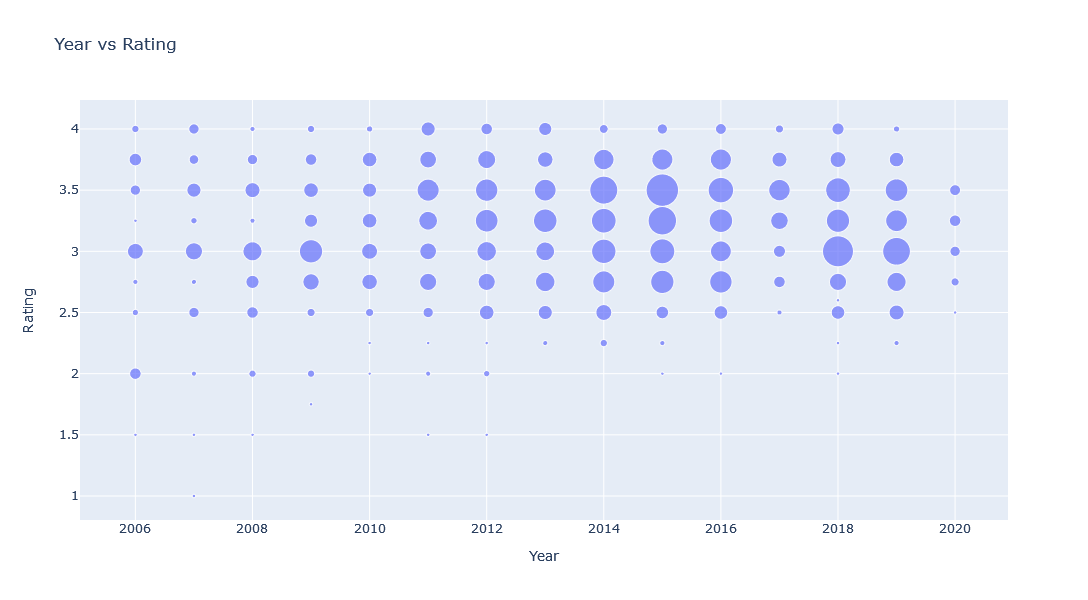

In [15]:
# Array for bubble size
year, rating = zip(*sz.index)

fig = px.scatter(x = year, y = rating, 
                 title = 'Year vs Rating', 
                 size = sz,
                 labels = {'x': 'Year', 'y': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 23,
                  width = 1200, height = 600)

fig.show()

## Location - Rating

### With company_continent Info

In [16]:
sz2 = choco.groupby(['review_date', 'rating', 'company_continent']).size()
sz2

review_date  rating  company_continent
2006         1.50    EU                    1
             2.00    EU                    5
                     NA                    4
                     SA                    1
             2.50    EU                    2
                                          ..
2020         2.75    NA                    4
             3.00    NA                    8
             3.25    NA                   10
             3.50    EU                    1
                     NA                    8
Length: 378, dtype: int64

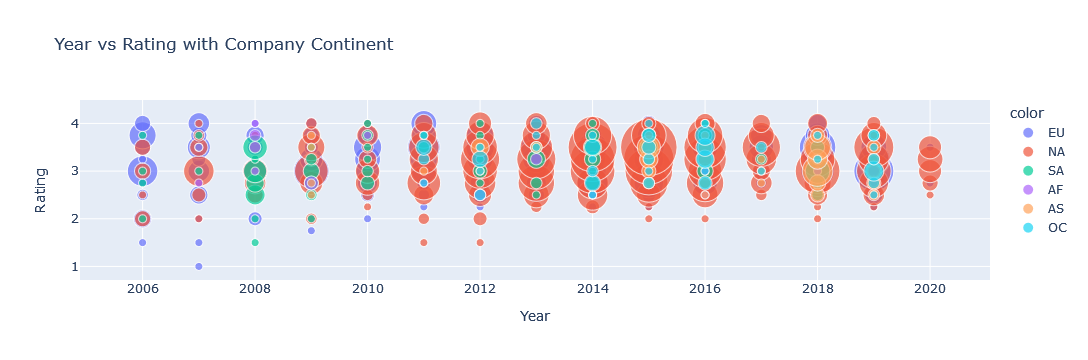

In [17]:
# Separate the axes
Year, Rating, Continent = zip(*sz2.index)

fig = px.scatter(x = Year, y = Rating, 
                 color = Continent,
                 title = 'Year vs Rating with Company Continent', size = sz2,
                 labels = {'x': 'Year', 'y': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max=40)

fig.show()

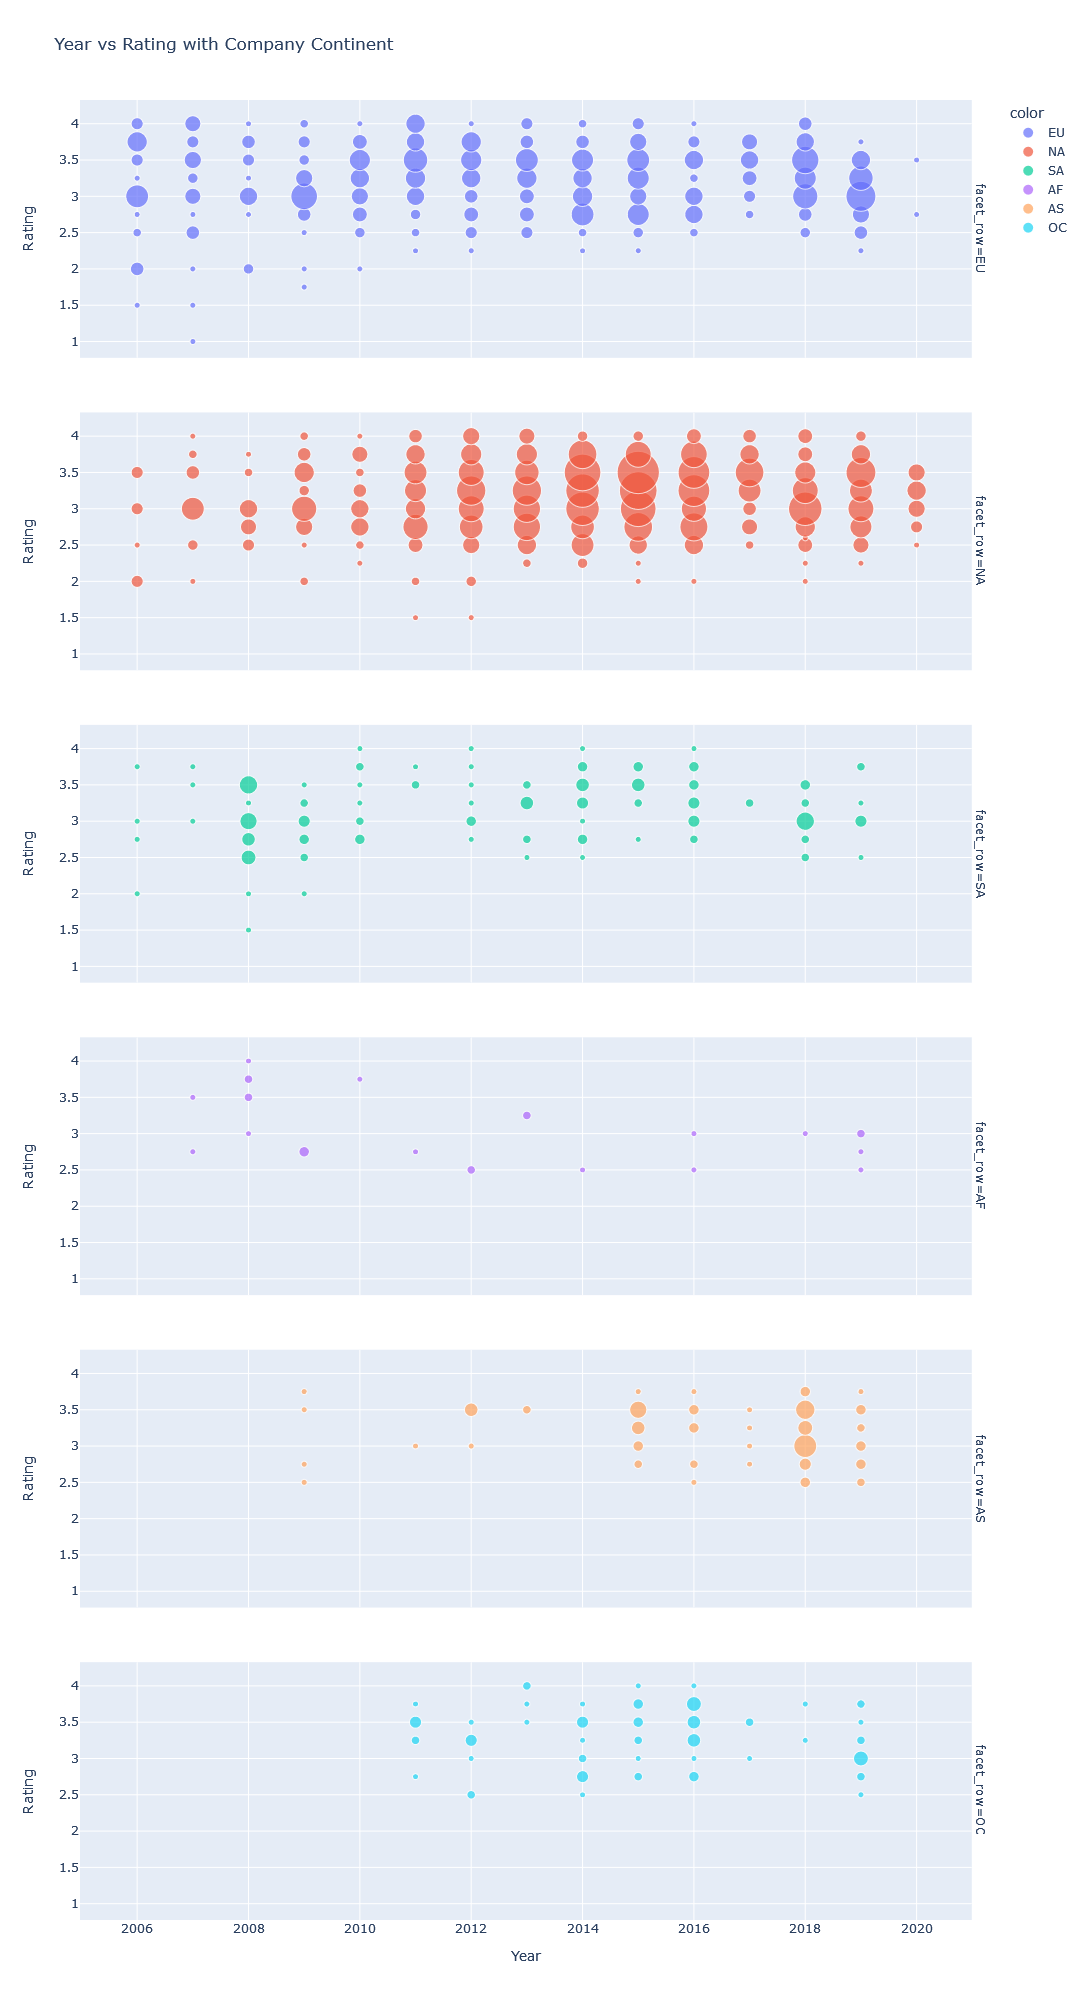

In [18]:
fig = px.scatter(x=Year, y=Rating, color = Continent, 
                 facet_row = Continent,
                 title = 'Year vs Rating with Company Continent', size = sz2,
                 labels = {'x': 'Year', 'y': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 800, height = 2000)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("facet_col=", "")))
fig.show()

### With origin_continent info

In [19]:
sz3 = choco.groupby(['review_date', 'rating', 'origin_continent']).size()
sz3

review_date  rating  origin_continent
2006         1.5     Unknown             1
             2.0     AF                  1
                     NA                  1
                     SA                  1
                     Unknown             7
                                        ..
2020         3.5     AF                  1
                     AS                  2
                     NA                  2
                     SA                  3
                     Unknown             1
Length: 474, dtype: int64

In [20]:
# Separate the axes
Yr, Ra, Con = zip(*sz3.index)

In [21]:
fig = px.scatter(x=Yr, y=Ra, color = Con,
                 title = 'Year vs Rating with Origin Continent', size = sz3,
                 labels = {'x': 'Year', 'y': 'Rating', 'size': 'Count'},
                 log_x=False, log_y = False, size_max=40)

fig.show()

In [22]:
fig = px.scatter(x = Yr, y = Ra, color = Con, 
                 facet_row = Con,
                 title = 'Year vs Rating with Origin Continent', size = sz3,
                 labels = {'x': 'Year', 'y': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max=30,
                 width = 800, height = 2000)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("facet_col=", "")))
fig.show()

## Ingredients - Rating

vanilla                           2224 non-null   int64  
 11  salt                              2224 non-null   int64  
 12  sugar                             2224 non-null   int64  
 13  sweetener                         2224 non-null   int64  
 14  cocoa_butter                      2224 non-null   int64  
 15  lecithin

### Salt

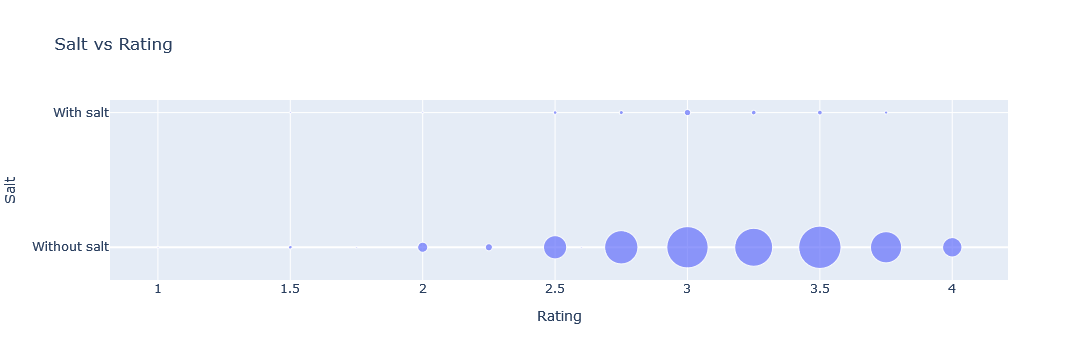

In [23]:
# review size by review date
sz_salt = choco.groupby(['salt', 'rating']).size()

# Array for bubble size
salt, rating = zip(*sz_salt.index)

fig = px.scatter(y = salt, x = rating, 
                 title = 'Salt vs Rating', 
                 size = sz_salt,
                 labels = {'y': 'Salt', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without salt', 'With salt'])

fig.show()

### Sugar

In [24]:
# review size by review date
sz_sugar = choco.groupby(['sugar', 'rating']).size()

# Array for bubble size
sugar, rating = zip(*sz_sugar.index)

fig = px.scatter(y = sugar, x = rating,
                 title = 'Sugar vs Rating',
                 size = sz_sugar,
                 labels = {'y': 'Sugar', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                  width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without sugar', 'With sugar'])

fig.show()

### Lectin

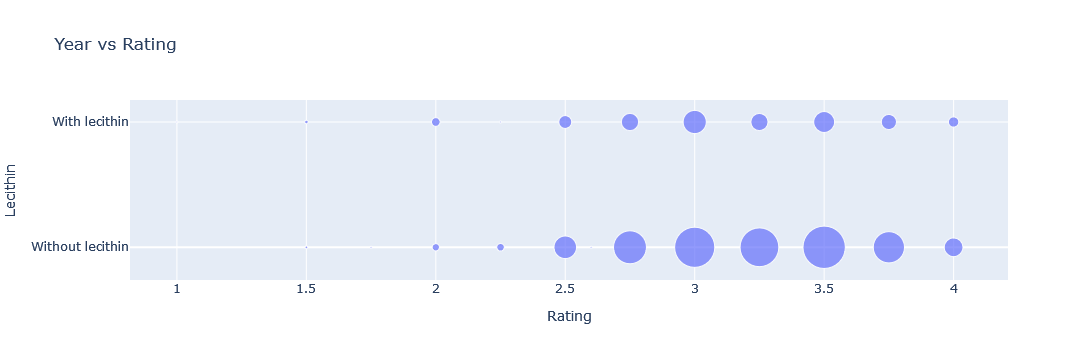

In [25]:
# review size by review date
sz_lecithin = choco.groupby(['lecithin', 'rating']).size()

# Array for bubble size
lecithin, rating = zip(*sz_lecithin.index)

fig = px.scatter(y = lecithin, x = rating,
                 title = 'Year vs Rating',
                 size = sz_lecithin,
                 labels = {'y': 'Lecithin', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                  width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without lecithin', 'With lecithin'])

fig.show()

### Vanilla

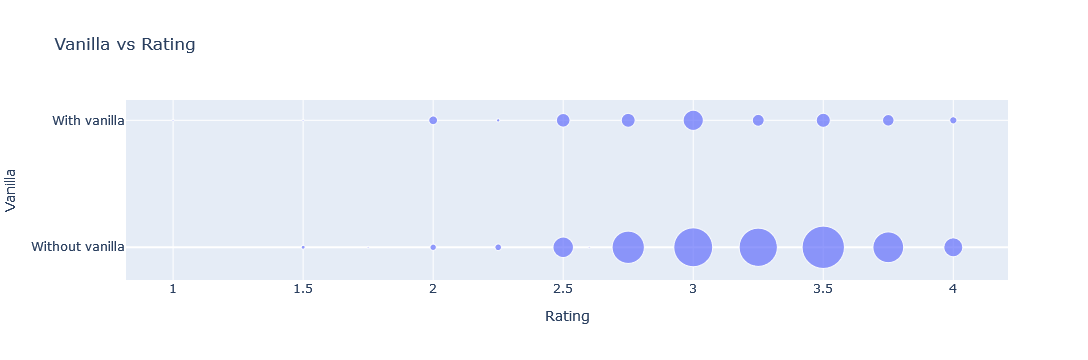

In [26]:
# review size by review date
sz_vanilla = choco.groupby(['vanilla', 'rating']).size()

# Array for bubble size
vanilla, rating = zip(*sz_vanilla.index)

fig = px.scatter(y = vanilla, x = rating,
                 title = 'Vanilla vs Rating',
                 size = sz_vanilla,
                 labels = {'y': 'Vanilla', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                  width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without vanilla', 'With vanilla'])

fig.show()

### Cocoa butter

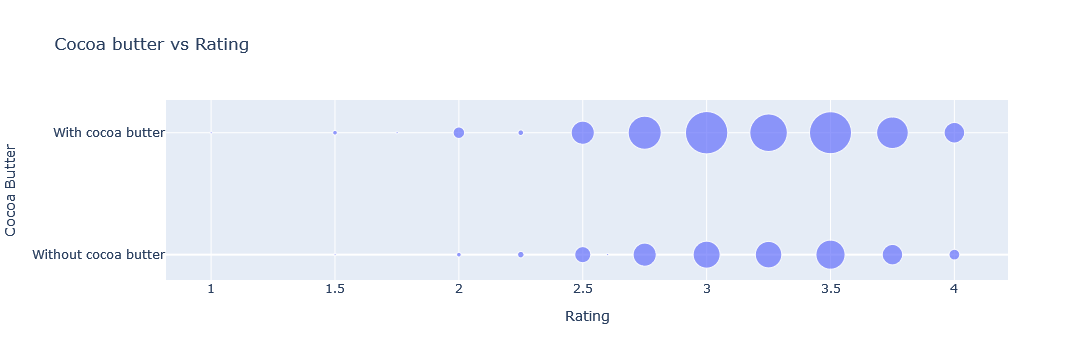

In [27]:
# review size by review date
sz_cocoa_butter = choco.groupby(['cocoa_butter', 'rating']).size()

# Array for bubble size
cocoa_butter, rating = zip(*sz_cocoa_butter.index)

fig = px.scatter(y = cocoa_butter, x = rating,
                 title = 'Cocoa butter vs Rating',
                 size = sz_cocoa_butter,
                 labels = {'y': 'Cocoa Butter', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                  width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without cocoa butter', 'With cocoa butter'])

fig.show()

### Sweetener

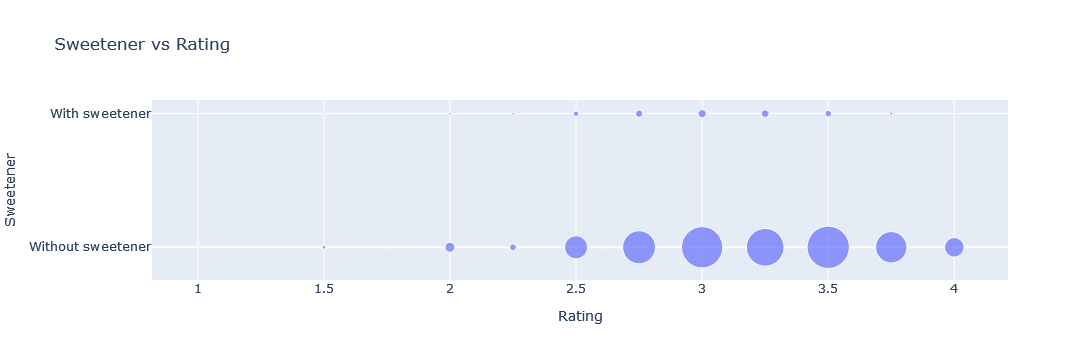

In [28]:
# review size by review date
sz_sweetener = choco.groupby(['sweetener', 'rating']).size()

# Array for bubble size
sweetener, rating = zip(*sz_sweetener.index)

fig = px.scatter(y = sweetener, x = rating,
                 title = 'Sweetener vs Rating',
                 size = sz_sweetener,
                 labels = {'y': 'Sweetener', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                  width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Without sweetener', 'With sweetener'])

fig.show()

## Taste profile - Rating

In [29]:
from scipy.stats import ttest_ind

In [30]:
taste_list = ['nutty', 'sweet', 'cocoa', 'roasty',
       'creamy', 'earthy', 'sandy', 'fatty', 'floral', 'intense', 'spicy',
       'sour', 'molasses', 'woody', 'vanilla_taste', 'sticky', 'fruit',
       'smokey']

In [31]:
saved_tastes = []
for taste in taste_list:
    no_taste = choco.loc[choco[taste]==0]['rating']
    has_taste = choco.loc[choco[taste]==1]['rating']
    test_statistic, pvalue = ttest_ind(no_taste, has_taste, equal_var=False)
    saved_tastes.append([pvalue, taste])

sorted(saved_tastes)

[[8.93107666813211e-29, 'fruit'],
 [3.2889370206051094e-19, 'cocoa'],
 [1.851726748160144e-17, 'creamy'],
 [3.754050255150409e-15, 'sandy'],
 [7.573594979883889e-14, 'vanilla_taste'],
 [2.656101850418397e-09, 'sour'],
 [5.256305575083328e-09, 'earthy'],
 [1.5334181310183415e-07, 'molasses'],
 [3.2594051498852565e-07, 'nutty'],
 [0.0007731924924169238, 'fatty'],
 [0.0010289332163885697, 'sweet'],
 [0.006272986154819669, 'spicy'],
 [0.017837701873874456, 'intense'],
 [0.17981453097462946, 'smokey'],
 [0.2678575462075152, 'woody'],
 [0.6348252541460055, 'roasty'],
 [0.8051814012194379, 'floral'],
 [0.8216689758826289, 'sticky']]

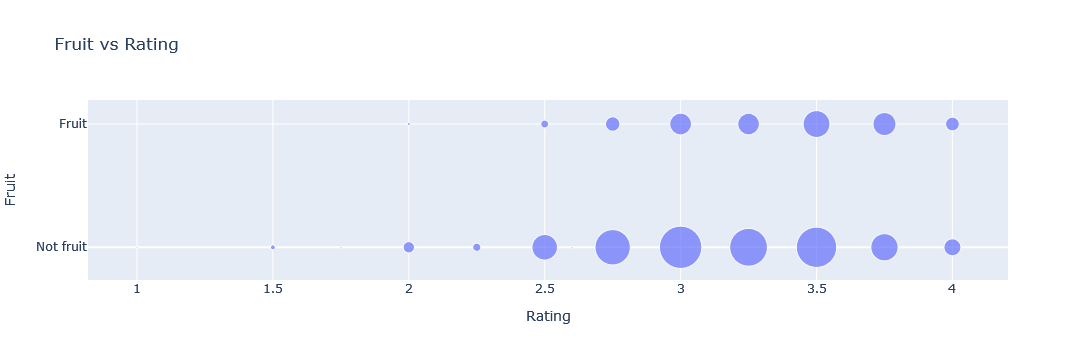

In [32]:
# review size by fruit taste
sz_fruit = choco.groupby(['fruit', 'rating']).size()

# Array for bubble size
fruit, rating = zip(*sz_fruit.index)

fig = px.scatter(y = fruit, x = rating, 
                 title = 'Fruit vs Rating', 
                 size = sz_fruit,
                 labels = {'y': 'Fruit', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Not fruit', 'Fruit'])

fig.show()

In [33]:
# review size by cocoa taste
sz_cocoa = choco.groupby(['cocoa', 'rating']).size()

# Array for bubble size
cocoa, rating = zip(*sz_cocoa.index)

fig = px.scatter(y = cocoa, x = rating, 
                 title = 'Cocoa vs Rating', 
                 size = sz_cocoa,
                 labels = {'y': 'Cocoa', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Not cocoa', 'Cocoa'])

fig.show()

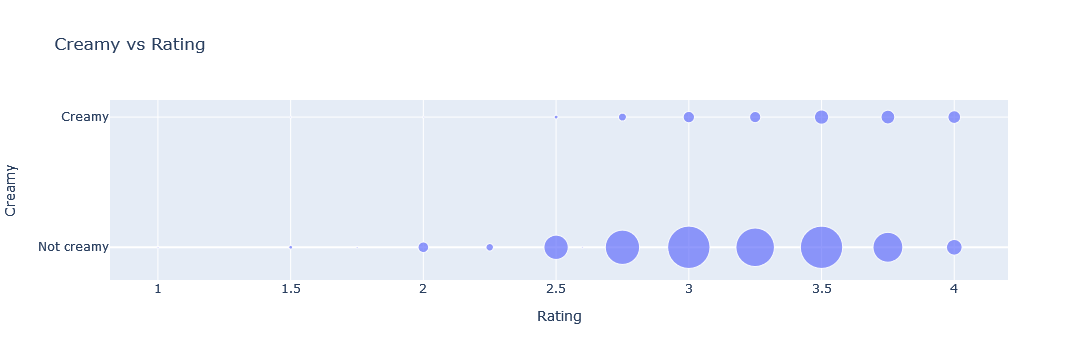

In [34]:
# review size by creamy taste
sz_creamy = choco.groupby(['creamy', 'rating']).size()

# Array for bubble size
creamy, rating = zip(*sz_creamy.index)

fig = px.scatter(y = creamy, x = rating, 
                 title = 'Creamy vs Rating', 
                 size = sz_creamy,
                 labels = {'y': 'Creamy', 'x': 'Rating', 'size': 'Count'},
                 log_x = False, log_y = False, size_max = 30,
                 width = 600, height = 300)

fig.update_yaxes(
                 tickmode = 'array',
                 tickvals = [0, 1],
                 ticktext= ['Not creamy', 'Creamy'])

fig.show()

# Statistical Tests
Hypothesis tests to determine which features are significantly correlated to ratings. 

## Ingredients

In [35]:
from scipy.stats import ttest_ind

In [36]:
no_vanilla = choco.loc[choco['vanilla']==0]['rating']
vanilla = choco.loc[choco['vanilla']==1]['rating']
print(len(no_vanilla), len(vanilla))
print(no_vanilla.std(), vanilla.std())

ttest_ind(no_vanilla, vanilla, equal_var=False)

1876 348
0.4136834341053074 0.5009323142344694


Ttest_indResult(statistic=6.914546973162771, pvalue=1.6636701407093907e-11)

In [37]:
no_salt = choco.loc[choco['salt']==0]['rating']
salt = choco.loc[choco['salt']==1]['rating']
print(len(no_salt), len(salt))
print(no_salt.std(), salt.std())

ttest_ind(no_salt, salt, equal_var=False)

2187 37
0.4331554670553555 0.47428229325338894


Ttest_indResult(statistic=2.2215580760068794, pvalue=0.032508576407408625)

In [38]:
no_sugar = choco.loc[choco['sugar']==0]['rating']
sugar = choco.loc[choco['sugar']==1]['rating']
print('sample size:', len(no_sugar), len(sugar))
print('sample std:', no_sugar.std(), sugar.std())
print('sample mean:', no_sugar.mean(), sugar.mean())

ttest_ind(no_sugar, sugar, equal_var=False)

sample size: 82 2142
sample std: 0.42305402304402057 0.4329317284473645
sample mean: 2.9939024390243905 3.2063958916900095


Ttest_indResult(statistic=-4.459858537670293, pvalue=2.422008280201043e-05)

In [39]:
no_sweetener = choco.loc[choco['sweetener']==0]['rating']
sweetener = choco.loc[choco['sweetener']==1]['rating']
print('sample size:', len(no_sweetener), len(sweetener))
print('sample std:', no_sweetener.std(), sweetener.std())
print('sample mean:', no_sweetener.mean(), sweetener.mean())

ttest_ind(no_sweetener, sweetener, equal_var=False)

sample size: 2148 76
sample std: 0.4328218080379522 0.43107118718496207
sample mean: 3.205702979515829 2.9967105263157894


Ttest_indResult(statistic=4.153151433703879, pvalue=8.11125701237498e-05)

In [40]:
no_cocoa_butter = choco.loc[choco['cocoa_butter']==0]['rating']
cocoa_butter = choco.loc[choco['cocoa_butter']==1]['rating']
print('sample size:', len(no_cocoa_butter), len(cocoa_butter))
print('sample std:',no_cocoa_butter.std(), cocoa_butter.std())
print('sample mean:',no_cocoa_butter.mean(), cocoa_butter.mean())

ttest_ind(no_cocoa_butter, cocoa_butter, equal_var=False)

sample size: 689 1535
sample std: 0.4144590881797639 0.44304388851768806
sample mean: 3.1906386066763424 3.202117263843648


Ttest_indResult(statistic=-0.5910340597866883, pvalue=0.5545924255657099)

In [41]:
no_lecithin = choco.loc[choco['lecithin']==0]['rating']
lecithin = choco.loc[choco['lecithin']==1]['rating']
print('sample size:', len(no_lecithin), len(lecithin))
print('sample std:', no_lecithin.std(), lecithin.std())
print('sample mean:', no_lecithin.mean(), lecithin.mean())

ttest_ind(no_lecithin, lecithin, equal_var=False)

sample size: 1745 479
sample std: 0.4177053654643883 0.48620256947719365
sample mean: 3.2145272206303726 3.1403966597077244


Ttest_indResult(statistic=3.042892902122127, pvalue=0.002432962438213734)

Cocoa butter may not have a significant impact on the rating. We discard it for multilinear regression model. 

Other factors are significant.

## Company Location

In [42]:
d = {'U.S.A':'United States', 'U.s.a.':'United States', 'U.k.':'United Kingdom', 
     'Wales':'United Kingdom', 'Russia':'Russian Federation', 'Scotland':'United Kingdom',  
     'St. lucia':'Saint Lucia', 'Sao tome & principe':'Sao Tome and Principe',
     'Sao tome':'Sao Tome and Principe', 'Principe':'Sao Tome and Principe',
     'St.vincent-grenadines':'Saint Vincent and the Grenadines', 
     'U.a.e.':'United Arab Emirates', 'Ivory coast':"Republic of Côte d'Ivoire",
     'Burma':'Myanmar', 'Trinidad':'Trinidad and Tobago', 'Bolvia':'Bolivia',
     'Tobago':'Trinidad and Tobago', 'Sumatra':'Indonesia', 'Sulawesi':'Indonesia',
     'Dr congo':'Congo'}

In [43]:
for k, v in d.items():
    choco['company_location'] = choco['company_location'].replace(k, v)

In [44]:
from scipy.stats import f_oneway
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [45]:
def get_continent(country):
    
    try:
        cn_continent = country_alpha2_to_continent_code(pycountry.countries.lookup(country.lower()).alpha_2)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

In [46]:
continent = []
for i in range(len(choco)):
    continent.append(get_continent(choco.iloc[i]['company_location']))

In [47]:
choco['company_continent'] = continent

In [48]:
tmp1 = choco['company_continent'].unique().tolist()

for c in tmp1:
    cc = choco.loc[choco['company_continent']==c]['rating']
    print('continent:', c,
          'size:', len(cc),
          'std:', cc.std(),
          'mean:', cc.mean())

continent: NA size: 1175 std: 0.4292401028091181 mean: 3.18731914893617
continent: EU size: 683 std: 0.45356458919479975 mean: 3.2243777452415814
continent: OC size: 85 std: 0.3956167400932584 mean: 3.2941176470588234
continent: SA size: 156 std: 0.4399031540535218 mean: 3.1458333333333335
continent: AS size: 100 std: 0.3497022543059547 mean: 3.1925
continent: AF size: 25 std: 0.4621056877670591 mean: 3.05


In [49]:
company_NA = choco.loc[choco['company_continent']=='NA']['rating']
company_EU = choco.loc[choco['company_continent']=='EU']['rating']
company_OC = choco.loc[choco['company_continent']=='OC']['rating']
company_SA = choco.loc[choco['company_continent']=='SA']['rating']
company_AS = choco.loc[choco['company_continent']=='AS']['rating']
company_AF = choco.loc[choco['company_continent']=='AF']['rating']

In [50]:
f_oneway(company_NA, company_EU, company_OC,
         company_SA, company_AS, company_AF)

F_onewayResult(statistic=2.5202331414334678, pvalue=0.027715313970479574)

__Company continents are significant__

## Bean origins

In [51]:
for k, v in d.items():
    choco['country_of_bean_origin'] = choco['country_of_bean_origin'].replace(k, v)

In [52]:
origin_continent = []
for i in range(len(choco)):
    origin_continent.append(get_continent(choco.iloc[i]['country_of_bean_origin']))

In [53]:
choco['origin_continent'] = origin_continent

In [54]:
choco.loc[choco['origin_continent']=='Unknown']['country_of_bean_origin'].unique()

array(['Blend'], dtype=object)

In [55]:
tmp2 = choco['origin_continent'].unique().tolist()

for c in tmp2:
    oc = choco.loc[choco['origin_continent']==c]['rating']
    print('continent:', c,
          'size:', len(oc),
          'std:', oc.std(),
          'mean:', oc.mean())

continent: AF size: 309 std: 0.4236713156260132 mean: 3.2063106796116503
continent: NA size: 694 std: 0.39744167362785265 mean: 3.1986311239193084
continent: SA size: 851 std: 0.4526360355290233 mean: 3.2150411280846063
continent: OC size: 91 std: 0.3916676408685569 mean: 3.2225274725274726
continent: AS size: 139 std: 0.3494376374921427 mean: 3.181654676258993
continent: Unknown size: 140 std: 0.5849144138515872 mean: 3.0821428571428573


In [56]:
origin_NA = choco.loc[choco['origin_continent']=='NA']['rating']
origin_OC = choco.loc[choco['origin_continent']=='OC']['rating']
origin_SA = choco.loc[choco['origin_continent']=='SA']['rating']
origin_AS = choco.loc[choco['origin_continent']=='AS']['rating']
origin_AF = choco.loc[choco['origin_continent']=='AF']['rating']
origin_Unknown = choco.loc[choco['origin_continent']=='Unknown']['rating']

In [57]:
f_oneway(origin_NA, origin_AF, origin_OC,
         origin_SA, origin_AS, origin_Unknown)

F_onewayResult(statistic=2.3813297468852017, pvalue=0.03642904715194341)

__Bean origins are also significant.__